
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Mar 13, 2020)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [18]:
import math
import io
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import scipy.optimize
import scipy.spatial
poll = pd.read_csv('poll-larger.csv')
poll['vote'].value_counts(normalize = True)

Orgeron    0.5181
Saban      0.4819
Name: vote, dtype: float64

In [7]:
def sample(oregonWinPercent, n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < oregonWinPercent, 'Oregon', 'Saban')})
s = sample(0.5181, n = 1000)
s.head()

,vote
0,Oregon
1,Saban
2,Saban
3,Oregon
4,Saban


In [8]:
s['vote'].value_counts(normalize = True)

Oregon    0.525
Saban     0.475
Name: vote, dtype: float64

In [14]:
distDF = pd.DataFrame([sample(0.5181)['vote'].value_counts(normalize = True) for i in range(1000)])
distDF.head()

,Oregon,Saban
vote,0.516,0.484
vote,0.518,0.482
vote,0.524,0.476
vote,0.514,0.486
vote,0.537,0.463


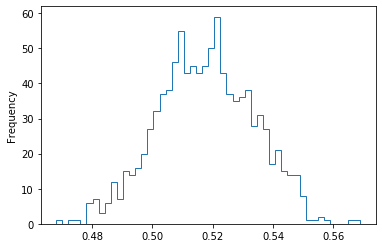

In [15]:
distDF['Oregon'].plot(kind = 'hist', histtype = 'step', bins = 50)

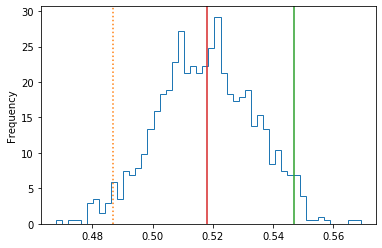

In [19]:
distDF['Oregon'].plot(kind='hist',histtype='step',bins=50, density=True)
plt.axvline(distDF['Oregon'].quantile(0.025), c = 'C1', linestyle = ':')
plt.axvline(distDF['Oregon'].quantile(0.975), c = 'C2', linestyle = '-')
plt.axvline(distDF['Oregon'].quantile(0.500), c='C3')

95% confidence interval is: [0.49, 0.55]
Estimate = 0.52 +/- 0.03
Here, 0.52 is the <b>point estimate</b>, and 0.03 is the <b>margin of error</b> on either side of the point estimate.

In [22]:
def samplingdist(oregonWinPercent, n = 1000):
    return pd.DataFrame([sample(oregonWinPercent, n)['vote'].value_counts(normalize=True) for i in range(1000)])

In [30]:
def quantile(oregonWinPercent, n = 1000):
    distDF = samplingdist(oregonWinPercent, n)
    return distDF['Oregon'].quantile(0.025), distDF['Oregon'].quantile(0.975)

In [31]:
quantile(0.5181)

(0.487975, 0.55)